# Creation of boxplots from the experimental data 

Import the necessary packages

In [1]:
import pandas as pd # used to manipulate and create dataframes
import matplotlib.pyplot as plt #used to make plots and visualizations
import glob # used to search for the name of the files


## Data ingestion

In [4]:
#We define the name of the folders where the data is
path = 'first'
path2 = 'second'

#We save the name of the files in our variable n_experiment and define the patter for glob to search 
first_experiment = glob.glob(path + "/[c]*.csv" )
second_experiment = glob.glob(path2 + "/[c]*.csv" )


concentraciones = []

# here we extract the concentrations defining the pattern to only extract the number 
for item in first_experiment:
      concentraciones.append(item[item.find("c")+1:item.find(".")])

print(first_experiment)
print(concentraciones)

['first/c0.csv', 'first/c20.csv', 'first/c40.csv', 'first/c60.csv', 'first/c80.csv', 'first/c100.csv']
['0', '20', '40', '60', '80', '100']


In [5]:
#We read each csv and store them in an array

#first experiment
lu= [pd.read_csv(filename, sep=";") for filename in first_experiment] 


#second experiment
lu2= [pd.read_csv(filename, sep=";") for filename in second_experiment] 



# First experiment

In [9]:
# We define lists to save the scans from the first experiment
scan2 =[]
scan3 = []
scan4 = []
scan5 = []

# for the max current value
maxScan2=[]
maxScan3=[]
maxScan4=[]
maxScan5=[]


We have two experiments. Each experiment has a range of concentrations from 0 to 100 (0, 20, 40, 60, 80, 100), and each has five scans. To measure the precision, we need to group each scan for each concentration merging in experiments.

In [10]:
# Here we separate the data by scan 
for item in lu:
    for n in range(2,6,1):
        if n==2:
            scan2.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])

        if n==3:
            scan3.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])

        if n==4:
            scan4.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])
            
        if n==5:
            scan5.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])





In [22]:
#Here whe see the column names from our dataframes
print(scan5[1].columns.values)

<class 'pandas.core.frame.DataFrame'>
['Potential applied (V)' 'Time (s)' 'WE(1).Current (A)'
 'WE(1).Potential (V)' 'Scan' 'Index' 'Q+' 'Q-' 'Current range' 'Overload']


We are analyzing data from electrochemical sensors, so we only care for the maximum value of the current, this value is in the 'WE(1).Current (A)' field.

In [23]:
#Extract maximum value for each concentration and in each scan
n=0
for n in range(0,6,1):
    maxScan2.append(scan2[n]["WE(1).Current (A)"].max())

n=0
for n in range(0,6,1):
    maxScan3.append(scan3[n]["WE(1).Current (A)"].max())

n=0
for n in range(0,6,1):
    maxScan4.append(scan4[n]["WE(1).Current (A)"].max())
    
n=0
for n in range(0,6,1):
    maxScan5.append(scan5[n]["WE(1).Current (A)"].max())

In [24]:
print(maxScan5)

[0.0014437866210937, 0.0015835571289062, 0.0016400146484375, 0.001793212890625, 0.0019415283203125, 0.0021478271484375]


In [25]:
# dataframe creation
df1= pd.DataFrame()

In [26]:
# we pass our filtered values to the dataframe
df1["scan 2"] = maxScan2[:]
df1["scan 3"] = maxScan3[:]
df1["scan 4"] = maxScan4[:]
df1["scan 5"] = maxScan5[:]

In [27]:
df1

,scan 2,scan 3,scan 4,scan 5
0,0.001445,0.001445,0.001444,0.001444
1,0.001557,0.001573,0.001581,0.001584
2,0.001628,0.001623,0.001628,0.001640
3,0.001796,0.001796,0.001793,0.001793
4,0.001933,0.001932,0.001938,0.001942
5,0.002154,0.002150,0.002151,0.002148


# Second experiment

Here we repeat the same steps for the second_experiment

In [28]:
scan22 =[]
scan33 = []
scan44 = []
scan55 = []
maxScan22=[]
maxScan33=[]
maxScan44=[]
maxScan55=[]

In [29]:
n=0
for item in lu2:
    for n in range(2,6,1):
        if n==2:
            scan22.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])

        if n==3:
            scan33.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])

        if n==4:
            scan44.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])
            
        if n==5:
            scan55.append(item[(item['Scan'] >= n) & (item['Scan'] <= n )])

In [30]:
n=0
for n in range(0,6,1):
    maxScan22.append(scan22[n]["WE(1).Current (A)"].max())

n=0
for n in range(0,6,1):
    maxScan33.append(scan33[n]["WE(1).Current (A)"].max())


n=0
for n in range(0,6,1):
    maxScan44.append(scan44[n]["WE(1).Current (A)"].max())
    
n=0
for n in range(0,6,1):
    maxScan55.append(scan55[n]["WE(1).Current (A)"].max())

In [31]:
df1["scan 22"] = maxScan22[:]
df1["scan 33"] = maxScan33[:]
df1["scan 44"] = maxScan44[:]
df1["scan 55"] = maxScan55[:]

# Adding concentration column 

In [32]:
# we add the concentrations to ouf dataframe
df1["[M]"]=concentraciones

In [33]:
df1

,scan 2,scan 3,scan 4,scan 5,scan 22,scan 33,scan 44,scan 55,[M]
0,0.001445,0.001445,0.001444,0.001444,0.001599,0.001596,0.001592,0.001591,0
1,0.001557,0.001573,0.001581,0.001584,0.001456,0.001469,0.001476,0.001481,20
2,0.001628,0.001623,0.001628,0.001640,0.001292,0.001289,0.001286,0.001284,40
3,0.001796,0.001796,0.001793,0.001793,0.001251,0.001259,0.001264,0.001267,60
4,0.001933,0.001932,0.001938,0.001942,0.001188,0.001188,0.001187,0.001186,80
5,0.002154,0.002150,0.002151,0.002148,0.001161,0.001161,0.001164,0.001172,100


# Boxplot

In [34]:
#How our data is not in order we save each record in a list to reorder the dataframe
data1= df1.iloc[0,0:8] # 60
data2= df1.iloc[1,0:8] #0
data3= df1.iloc[2,0:8] #100
data4= df1.iloc[3,0:8] #20
data5= df1.iloc[4,0:8] #40
data6= df1.iloc[5,0:8] #80


In [35]:
data=[data2,data4,data5,data1,data6,data3]

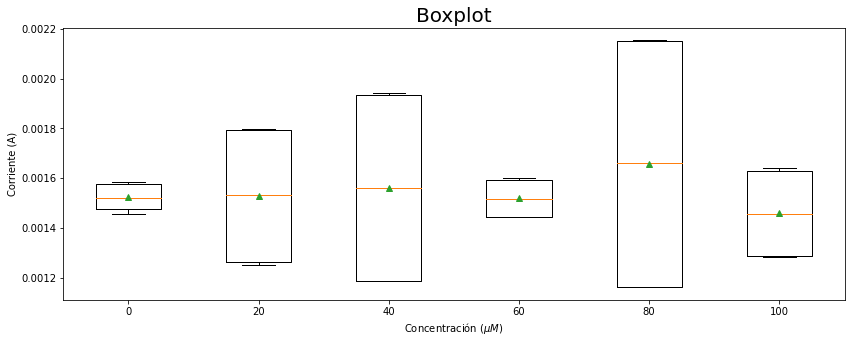

In [39]:
#Here we plot the dataframe

fig, ax = plt.subplots()  # used to make a figure
fig.set_size_inches(14, 5)  # define the plot sieze
plt.rc('legend', fontsize='small') # define the fontsize of the legend
plt.boxplot(data,labels=['0','20','40','60','80','100'],showmeans=True)
plt.ylabel("Corriente (A)") 
plt.xlabel("Concentración ($\mu M$)")
plt.title("Boxplot", fontsize = 20) # define the title of the plot  
plt.savefig("Cu_boxplot.png",dpi=300) # save the figure as a png file
plt.show()


In [37]:
#Export the dataframe to a csv file
df1.to_csv('boxplot.csv')